### K-Nearest Neighbour KNN
--> K-value means that number of Neighbour a Datapoint will Have.

--> when K-value is even then nearest neighbour's Class is Consider

--> when k-value is odd then majority of Neighbour's class is Consider

In [1]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Load the data set
claimants = pd.read_csv("C:/Users/Akaash/Downloads/claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
#Dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

# Removing NA values in data set
claimants = claimants.dropna()

In [4]:
# Dividing our data into input and output variables 
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [5]:
#Creating the k-folds 
num_folds = 10
kfold = KFold(num_folds)

In [6]:
#KNN Instance
model = KNeighborsClassifier(n_neighbors=20) # initially taking K-value = 20
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()*100)

68.9791492910759


Inference: When Initially took k-value of 20 then the accuracy came 68.97%, Now will hyper Tune the parameter Using Grid Search CV

#### Grid Search CV for Parameter Tuning

In [7]:
#Loading the Required library
from sklearn.model_selection import GridSearchCV

In [8]:
#Giving Multiple Value of K By using a Range
n_neighbors = np.array(range(1,51))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [9]:
#Creating Model Instance (KNN)
model = KNeighborsClassifier()

#Grid Search Instance
grid = GridSearchCV(estimator=model, param_grid=param_grid)

#Fitting the X & Y Variable
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [10]:
print(grid.best_score_)
print(grid.best_params_)

0.6916272312162723
{'n_neighbors': 10}


Inference: The best K-value will be 10 based on Grid Search CV with Accuracy of 69.16%

### Visualizing the CV results

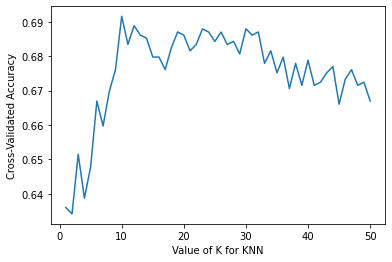

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 51
k_range = range(1, 51)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Inference: As You can see around kvalue 10 the highest is the Peak i.e arounnd 0.69